# EDA of Califronia's Climate Registry Information System

<img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="./Images/CalEPAlogo.png" >
California Environmental Protection Agency accounts for Greenhouse Gas emissions throughout the state. It uses the web-based Climate Registry Information System tool to calulate the Carbon Dioxide Equivalent. Agencies have the option to either aggergate their data or submit individual portions. In this Exploratory Data Analysis we are going to look at the different sources and the trends of which CO2e is produced.

This is currently a work in progress.`

In [1]:
import os
import numpy as np2
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
file_path = 'csv_file/'
california_co2e = pd.read_csv(file_path + 'ca-agencies-ghg-dataset-2010-2016.csv',engine='python')
california_co2e.head()

,Agency_Name,Emission_Year,Facility_Name,Source_Name,Activity_Type,Fuel_Type,Fuel,End_Use_Sector,Technology,Fuel_Quantity,Fuel_Quantity_Units,Mobile_Fuel_Quantity,Mobile_Fuel_Quantity_Units,CO2e_Metric_Tons
0,California African American Museum,2010,Building,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,740160.000,kWh,0.0,NaN,221.13951
1,California African American Museum,2010,Building,Natural Gas,Stationary Combustion - Scope 1,Natural Gas,Unspecified (Weighted U.S. Average),Commercial,Unspecified Technology,4916.000,therm,0.0,NaN,26.06463
2,California African American Museum,2010,Vehicle Fleet,Honda,Mobile Combustion - Scope 1,Motor Gasoline,All,Gasoline Passenger Cars,Cars (Model Year 2005),351.000,gal,6089.0,mi,3.08178
3,California African American Museum,2010,Vehicle Fleet,Van,Mobile Combustion - Scope 1,Motor Gasoline,All,"Gasoline Light Trucks (Vans, Pickup Trucks, SUVs)","Vans, Pickup Trucks, SUVs (Model Year 2003)",93.232,gal,2239.0,mi,0.81858
4,California African American Museum,2011,Building,Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,758040.000,kWh,0.0,NaN,226.48156


### Data Dictionary
The Data Dictionary below is taken from the official 2014 Data Dictionary. Not all Fields are the same and some are missing. A 2016 Data Dictionary could not be found. Green House Gas will be be referred as GHG.
* **Agency_Name :** Name of State Agency, also known as the Entity.
* **Emission_Year :** Year of GHG emissions
* **Facility_Name :** Name of a facility for each agency. Agencies can choose to separate their statewide operations into multiple facilities in CRIS, or pool them into a single facility at the entity-level 
* **Source_Name :** This is the name of a source of emissions within each facility. Examples include vehicles, natural gas, and electricity.
* **Activity_Type :** This is the category of activity which releases greenhouse gas emissions. There are three category types: Scope 1 (direct emissions), Scope 2 (indirect Emissions), and Biogenic (stationary or mobile combustion of biomass sources). Stationary sources are not movable in operation, such as boilers, furnaces, and emergency generators. Mobile combustion includes vehicles and anything which can move while in operation. Purchased electricity falls under Scope 2, indirect emissions. 
* **Fuel_Type :** The fuel type refers to the type of fuel that the source uses. For purchased electricity, the fuel type will be WECC California, which is the name of the regional electric grid. This information is selected by the state agency to determine the correct emission factor for CO2. 
* **Fuel :** This is more specific information, if applicable, about a fuel type. If there is no more specific information, the default value will be All. This information is selected by the state agency to determine the correct emission factor for CO2.
* **End_Use_Sector :** For non-electricity sources, this indicates the sector that a specific source belongs to. For vehicles, it indicates the vehicle type. For stationary sources, it indicates what industry sector (commercial, industrial, residential, electric power) the source belongs to. This information is selected by the state agency to determine the correct emission factor for CH4 and N2O.
* **Technology :** Depending upon the end use sector, technology refers to the emissions control, model year, or other technology, usually of combustion sources. Purchased electricity will have an unspecified technology as a default value. This information is selected by the state agency to determine the correct emission factor for CH4 and N2O.
* **Fuel_Quantity :** NA
* **Fuel_Quantity_Units :** NA
* **Mobile_Fuel_Quantity :** NA
* **Mobile_Fuel_Quantity_Units :** NA
* **CO2e_Metric_Tons :** This is the number, in metric tons, of carbon dioxide equivalent that each source emits annually. Carbon Dioxide equivalent is determined by adding up emissions of CO2, CH4, and N2O for each source, multiplying each source by its global warming potential (GWP) and summing these emissions into a single number. 

In [3]:
display(california_co2e.info())
display(california_co2e.describe())
for col in california_co2e.columns:
    display('There are ' + str(california_co2e[col].nunique()) + 
            ' unique entries in the ' + str(col) + ' column')
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10917 entries, 0 to 10916
Data columns (total 14 columns):
Agency_Name                   10917 non-null object
Emission_Year                 10917 non-null int64
Facility_Name                 10917 non-null object
Source_Name                   10917 non-null object
Activity_Type                 10917 non-null object
Fuel_Type                     10724 non-null object
Fuel                          10724 non-null object
End_Use_Sector                10917 non-null object
Technology                    10917 non-null object
Fuel_Quantity                 10494 non-null float64
Fuel_Quantity_Units           10843 non-null object
Mobile_Fuel_Quantity          10845 non-null float64
Mobile_Fuel_Quantity_Units    2192 non-null object
CO2e_Metric_Tons              10568 non-null float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.2+ MB


None

,Emission_Year,Fuel_Quantity,Mobile_Fuel_Quantity,CO2e_Metric_Tons
count,10917.000000,1.049400e+04,1.084500e+04,1.056800e+04
mean,2013.661629,6.164358e+06,1.429822e+05,1.692429e+03
std,2.018421,2.688140e+08,3.181972e+06,2.676186e+04
min,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2012.000000,2.659750e+03,0.000000e+00,5.706202e+00
50%,2014.000000,3.599428e+04,0.000000e+00,3.304822e+01
75%,2015.000000,2.626140e+05,0.000000e+00,1.880655e+02
max,2016.000000,2.008479e+10,1.408489e+08,1.025543e+06


'There are 42 unique entries in the Agency_Name column'

'There are 7 unique entries in the Emission_Year column'

'There are 1113 unique entries in the Facility_Name column'

'There are 545 unique entries in the Source_Name column'

'There are 15 unique entries in the Activity_Type column'

'There are 23 unique entries in the Fuel_Type column'

'There are 35 unique entries in the Fuel column'

'There are 26 unique entries in the End_Use_Sector column'

'There are 85 unique entries in the Technology column'

'There are 7378 unique entries in the Fuel_Quantity column'

'There are 12 unique entries in the Fuel_Quantity_Units column'

'There are 872 unique entries in the Mobile_Fuel_Quantity column'

'There are 6 unique entries in the Mobile_Fuel_Quantity_Units column'

'There are 8470 unique entries in the CO2e_Metric_Tons column'

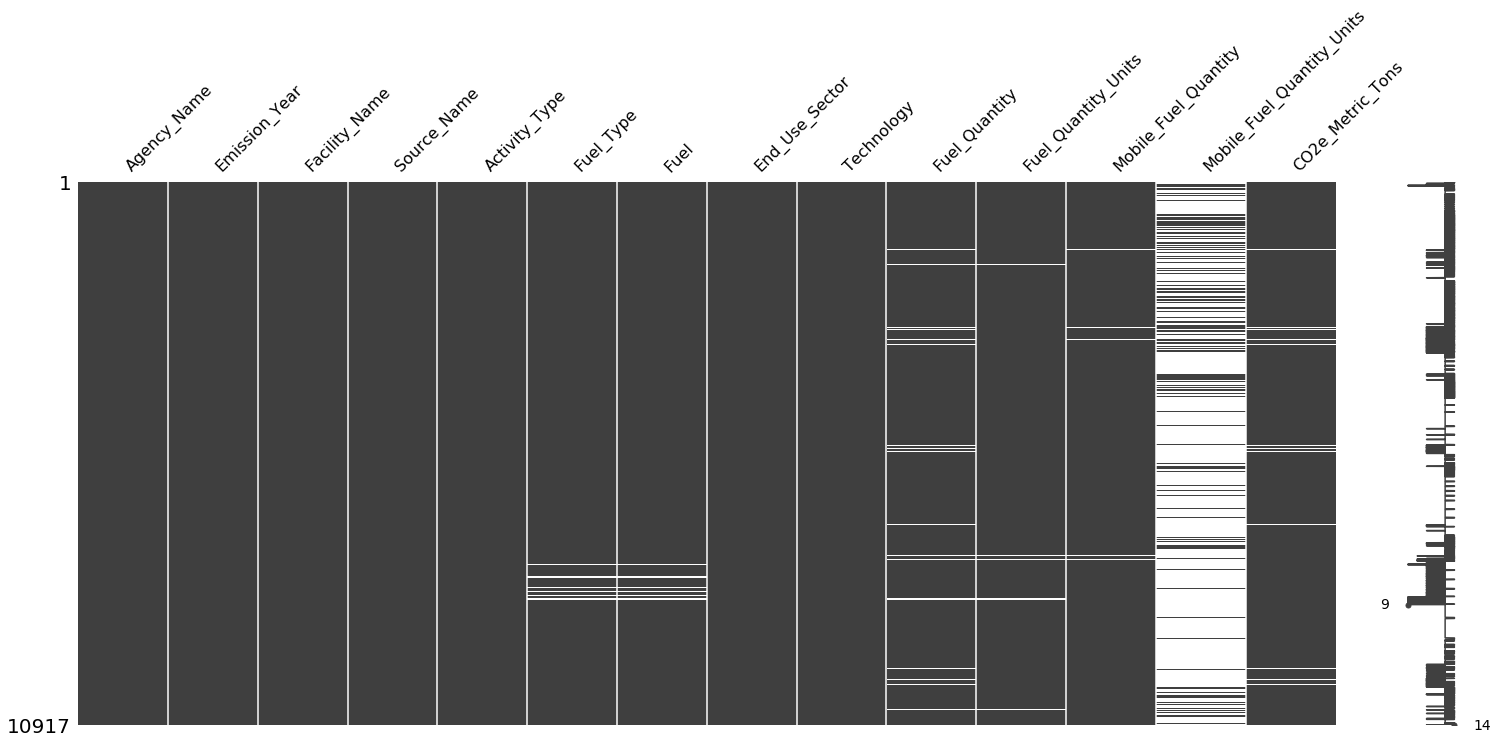

In [5]:
msno.matrix(california_co2e)

In [149]:
zero_co2e = california_co2e[california_co2e['CO2e_Metric_Tons']==0]
nan_co2e = california_co2e[california_co2e['CO2e_Metric_Tons'].isnull()]
display(zero_co2e.head())
nan_co2e.head()

,Agency_Name,Emission_Year,Facility_Name,Source_Name,Activity_Type,Fuel_Type,Fuel,End_Use_Sector,Technology,Fuel_Quantity,Fuel_Quantity_Units,Mobile_Fuel_Quantity,Mobile_Fuel_Quantity_Units,CO2e_Metric_Tons
122,California Coastal Commission,2016,North Coast District Office,Electricity - Location Based,Purchased Electricity - Location Based - Scope 2,Regional Grid-Average,WECC California,2016,Unspecified Technology,0.0,kWh,0.0,NaN,0.0
123,California Coastal Commission,2016,North Coast District Office,Electricity - Market Based,Purchased Electricity - Market Based - Scope 2,Regional Grid-Average,WECC California,2016,Unspecified Technology,0.0,kWh,0.0,NaN,0.0
484,California Department of Consumer Affairs,2014,4124 W. Swift Avenue,Natural Gas,Stationary Combustion - Scope 1,Natural Gas,Unspecified (Weighted U.S. Average),Commercial,Unspecified Technology,0.0,MMBtu,0.0,NaN,0.0
554,California Department of Consumer Affairs,2016,2625 Aztec Drive,Electricity - Location Based,Purchased Electricity - Location Based - Scope 2,Regional Grid-Average,WECC California,2016,Unspecified Technology,0.0,kWh,0.0,NaN,0.0
1353,California Department of Corrections and Rehab...,2015,CAL-CALIPATRIA STATE PRISON,Propane,Stationary Combustion - Scope 1,Fossil Fuel-derived Fuels (gaseous),Propane (Gas),Industrial,Unspecified Technology,0.0,GGE,0.0,NaN,0.0


,Agency_Name,Emission_Year,Facility_Name,Source_Name,Activity_Type,Fuel_Type,Fuel,End_Use_Sector,Technology,Fuel_Quantity,Fuel_Quantity_Units,Mobile_Fuel_Quantity,Mobile_Fuel_Quantity_Units,CO2e_Metric_Tons
77,California Coastal Commission,2014,North Coast District Office (previous location),Electricity,Purchased Electricity - Scope 2,WECC California,All,All,Unspecified Technology,NaN,kWh,0.0,NaN,NaN
81,California Coastal Commission,2014,South Coast District Office,Natural Gas,Scope 2 (Optional),NaN,NaN,All,Unspecified Technology,NaN,therm,0.0,NaN,NaN
1373,California Department of Corrections and Rehab...,2015,CDCR - Fleet Vehicles,CNG,Mobile Combustion - Scope 1,Alternative Fuels,Compressed Natural Gas (CNG),Medium and Heavy-Duty Vehicles,Unspecified Technology,NaN,GGE,NaN,mi,NaN
1374,California Department of Corrections and Rehab...,2015,CDCR - Fleet Vehicles,Diesel,Mobile Combustion - Scope 1,Diesel Fuel,All,Diesel Medium and Heavy-Duty Trucks and Busses,Medium and Heavy-Duty Vehicles (Model Years 19...,NaN,gal,NaN,mi,NaN
1375,California Department of Corrections and Rehab...,2015,CDCR - Fleet Vehicles,Motor Gasoline,Mobile Combustion - Scope 1,Motor Gasoline,All,Gasoline Passenger Cars,EPA Tier 1,NaN,gal,NaN,mi,NaN


(array([521., 403., 280., 212., 268., 244., 234., 206., 162., 189.]),
 array([ 2.00178466,  3.80160619,  5.60142773,  7.40124926,  9.2010708 ,
        11.00089233, 12.80071386, 14.6005354 , 16.40035693, 18.20017847,
        20.        ]),
 <a list of 10 Patch objects>)

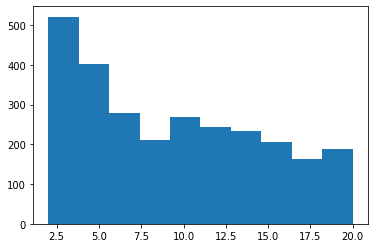

In [150]:
california_co2e = california_co2e[california_co2e['CO2e_Metric_Tons']>=2]
co2e_above200k = california_co2e[california_co2e['CO2e_Metric_Tons']>200000]
co2e_below20 = california_co2e[california_co2e['CO2e_Metric_Tons']<=20]
#display(co2e_below200k.head())
#fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
plt.hist(co2e_below20['CO2e_Metric_Tons'])
#ax[1].hist(co2e_above200k['CO2e_Metric_Tons'])

In [151]:
california_co2e['Emission_Year'].unique()
yearly_co2 = california_co2e[['Emission_Year', 'CO2e_Metric_Tons']].groupby('Emission_Year').sum()
yearly_co2

,CO2e_Metric_Tons
Emission_Year,
2010,3.936886e+06
2011,2.974829e+06
2012,3.042227e+06
2013,2.220108e+06
2014,1.471231e+06
2015,1.990495e+06
2016,2.248834e+06


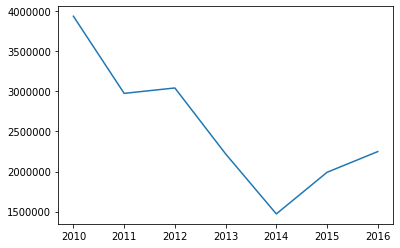

In [152]:
plt.plot(yearly_co2)

In [153]:
california_co2e_per_year = california_co2e['CO2e_Metric_Tons'].count()
california_co2e_per_year

8865

In [184]:
nan_co2e['CO2e_Metric_Tons'] = nan_co2e['CO2e_Metric_Tons'].fillna('missing')
nan_co2e_yearly = nan_co2e[['Emission_Year', 'CO2e_Metric_Tons']].groupby('Emission_Year', as_index=False).count()
nan_co2e_yearly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 2 columns):
Emission_Year       3 non-null int64
CO2e_Metric_Tons    3 non-null int64
dtypes: int64(2)
memory usage: 72.0 bytes


In [185]:
years_with_no_nan = [
    pd.Series([2010, 0], index=nan_co2e_yearly.columns),
    pd.Series([2011, 0], index=nan_co2e_yearly.columns),
    pd.Series([2012, 0], index=nan_co2e_yearly.columns),
    pd.Series([2013, 0], index=nan_co2e_yearly.columns),
]
nan_co2e_yearly = nan_co2e_yearly.append(years_with_no_nan, ignore_index=True).sort_values('Emission_Year')


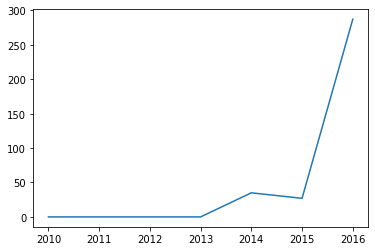

In [186]:
plt.plot('Emission_Year', 'CO2e_Metric_Tons', data=nan_co2e_yearly)